# Introducción al Procesamiento del Lenguaje Natural

## Word embeddings 

### Tokens

In [ ]:
# Librerias
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
texto= """ 
/DON QUIJOTE DE LA MANCHA/
Miguel de Cervantes Saavedra

*PRIMERA PARTE*
CAPÍTULO 1: / Que trata de la condicioón y ejercicio del famoso hidalgo D. Quijote de la Mancha ¿
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que viviía un hidalgo de los de lanza en astillero, adarga antigua, rociín flaco y galgo corredor. 
Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. 
El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. 
Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. 
Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, seco de carnes, enjuto de rostro; gran madrugador y amigo de la caza."""

In [ ]:
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

216
['/DON', 'QUIJOTE', 'DE', 'LA', 'MANCHA/', 'Miguel', 'de', 'Cervantes', 'Saavedra', '*PRIMERA', 'PARTE*', 'CAPÍTULO', '1', ':', '/', 'Que', 'trata', 'de', 'la', 'condicioón', 'y', 'ejercicio', 'del', 'famoso', 'hidalgo', 'D.', 'Quijote', 'de', 'la', 'Mancha', '¿', 'En', 'un', 'lugar', 'de', 'la', 'Mancha', ',', 'de', 'cuyo', 'nombre', 'no', 'quiero', 'acordarme', ',', 'no', 'ha', 'mucho', 'tiempo', 'que', 'viviía', 'un', 'hidalgo', 'de', 'los', 'de', 'lanza', 'en', 'astillero', ',', 'adarga', 'antigua', ',', 'rociín', 'flaco', 'y', 'galgo', 'corredor', '.', 'Una', 'olla', 'de', 'algo', 'más', 'vaca', 'que', 'carnero', ',', 'salpicón', 'las', 'más', 'noches', ',', 'duelos', 'y', 'quebrantos', 'los', 'sábados', ',', 'lentejas', 'los', 'viernes', ',', 'algún', 'palomino', 'de', 'añadidura', 'los', 'domingos', ',', 'consumían', 'las', 'tres', 'partes', 'de', 'su', 'hacienda', '.', 'El', 'resto', 'della', 'concluían', 'sayo', 'de', 'velarte', ',', 'calzas', 'de', 'velludo', 'para', 'la

## Limpieza de texto

### Normalizamos el texto

In [ ]:
# Pasamos el texto a minúsculas
texto_limpio = texto.lower()
print(texto_limpio)

 
/don quijote de la mancha/
miguel de cervantes saavedra

*primera parte*
capítulo 1: / que trata de la condicioón y ejercicio del famoso hidalgo d. quijote de la mancha ¿
en un lugar de la mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que viviía un hidalgo de los de lanza en astillero, adarga antigua, rociín flaco y galgo corredor. 
una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. 
el resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. 
tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. 
frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, se

**Removemos signos de puntuación**

In [ ]:
sig_puntuacion = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«", "/", "¿", "*", ";", ",", "."]
#Limpiamos signos de puntuación
for signo in sig_puntuacion:
    texto_limpio = texto_limpio.replace(signo,"")

# Retiramos tíldes y ñ
a,b = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
trans = str.maketrans(a,b)
texto_limpio = texto_limpio.translate(trans)
print(texto_limpio.translate(trans))

 
don quijote de la mancha
miguel de cervantes saavedra

primera parte
capitulo 1  que trata de la condicioon y ejercicio del famoso hidalgo d quijote de la mancha 
en un lugar de la mancha de cuyo nombre no quiero acordarme no ha mucho tiempo que viviia un hidalgo de los de lanza en astillero adarga antigua rociin flaco y galgo corredor 
una olla de algo mas vaca que carnero salpicon las mas noches duelos y quebrantos los sabados lentejas los viernes algún palomino de anadidura los domingos consumian las tres partes de su hacienda 
el resto della concluian sayo de velarte calzas de velludo para las fiestas con sus pantuflos de lo mismo los días de entre semana se honraba con su vellori de lo mas fino 
tenia en su casa una ama que pasaba de los cuarenta y una sobrina que no llegaba a los veinte y un mozo de campo y plaza que así ensillaba el rocin como tomaba la podadera 
frisaba la edad de nuestro hidalgo con los cincuenta anos era de complexion recia seco de carnes enjuto de rostr

**Removemos las stopwords.** 

Estas son palabras vacias sin significado como  artículos pronombres, preposiciones, etc.

In [ ]:
# Removemos los stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_spanish = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokens = nltk.word_tokenize(texto_limpio)
tokens_filtrados= [word for word in tokens if not word.lower() in stopwords_spanish]
texto_limpio=(" ").join(tokens_filtrados)

In [ ]:
print(texto_limpio)

don quijote mancha miguel cervantes saavedra primera parte capitulo 1 trata condicioon ejercicio famoso hidalgo d quijote mancha lugar mancha cuyo nombre quiero acordarme tiempo viviia hidalgo lanza astillero adarga antigua rociin flaco galgo corredor olla mas vaca carnero salpicon mas noches duelos quebrantos sabados lentejas viernes algún palomino anadidura domingos consumian tres partes hacienda resto della concluian sayo velarte calzas velludo fiestas pantuflos mismo días semana honraba vellori mas fino tenia casa ama pasaba cuarenta sobrina llegaba veinte mozo campo plaza así ensillaba rocin tomaba podadera frisaba edad hidalgo cincuenta anos complexion recia seco carnes enjuto rostro gran madrugador amigo caza


**Obtenemos tokens limpios**

In [ ]:
tokens_limpios = nltk.word_tokenize(texto_limpio)
print(len(tokens_limpios))
print(tokens_limpios)

102
['don', 'quijote', 'mancha', 'miguel', 'cervantes', 'saavedra', 'primera', 'parte', 'capitulo', '1', 'trata', 'condicioon', 'ejercicio', 'famoso', 'hidalgo', 'd', 'quijote', 'mancha', 'lugar', 'mancha', 'cuyo', 'nombre', 'quiero', 'acordarme', 'tiempo', 'viviia', 'hidalgo', 'lanza', 'astillero', 'adarga', 'antigua', 'rociin', 'flaco', 'galgo', 'corredor', 'olla', 'mas', 'vaca', 'carnero', 'salpicon', 'mas', 'noches', 'duelos', 'quebrantos', 'sabados', 'lentejas', 'viernes', 'algún', 'palomino', 'anadidura', 'domingos', 'consumian', 'tres', 'partes', 'hacienda', 'resto', 'della', 'concluian', 'sayo', 'velarte', 'calzas', 'velludo', 'fiestas', 'pantuflos', 'mismo', 'días', 'semana', 'honraba', 'vellori', 'mas', 'fino', 'tenia', 'casa', 'ama', 'pasaba', 'cuarenta', 'sobrina', 'llegaba', 'veinte', 'mozo', 'campo', 'plaza', 'así', 'ensillaba', 'rocin', 'tomaba', 'podadera', 'frisaba', 'edad', 'hidalgo', 'cincuenta', 'anos', 'complexion', 'recia', 'seco', 'carnes', 'enjuto', 'rostro',

### Lematización

In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 7.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import spacy

import es_core_news_sm
nlp = es_core_news_sm.load()

texto_prueba = "Soy un texto que pide a gritos que lo procesen. Por eso yo canto, tú cantas, ella canta, nosotros cantamos, cantáis, cantan"
doc = nlp(texto_prueba) # Modelo para lematización
lemmas = [tok.lemma_.lower() for tok in doc]
lemmas

['soy',
 'uno',
 'texto',
 'que',
 'pedir',
 'a',
 'grito',
 'que',
 'el',
 'procesar',
 '.',
 'por',
 'ese',
 'yo',
 'cantar',
 ',',
 'tú',
 'cantar',
 ',',
 'él',
 'cantar',
 ',',
 'nosotros',
 'cantar',
 ',',
 'cantar',
 ',',
 'cantar']

### Stemming

In [ ]:
import nltk
from nltk import SnowballStemmer
spanishstemmer=SnowballStemmer('spanish')
texto_prueba = "Soy un texto que pide a gritos que lo procesen. Por eso yo canto, tú cantas, ella canta, nosotros cantamos, cantáis, cantan"
tokens = nltk.word_tokenize(texto_prueba) # crear una lista de tokens
stems = [spanishstemmer.stem(token) for token in tokens]
print(stems)

['soy', 'un', 'text', 'que', 'pid', 'a', 'grit', 'que', 'lo', 'proces', '.', 'por', 'eso', 'yo', 'cant', ',', 'tu', 'cant', ',', 'ella', 'cant', ',', 'nosotr', 'cant', ',', 'cant', ',', 'cant']


Aplicamos a nuestro texto limpio de Don Quijote

In [ ]:
# Lematización
doc = nlp(texto_limpio) # Modelo para lematización
lemmas = [tok.lemma_.lower() for tok in doc]
texto_normalizado =(" ").join(lemmas)
print(texto_limpio)
print(texto_normalizado)

don quijote mancha miguel cervantes saavedra primera parte capitulo 1 trata condicioon ejercicio famoso hidalgo d quijote mancha lugar mancha cuyo nombre quiero acordarme tiempo viviia hidalgo lanza astillero adarga antigua rociin flaco galgo corredor olla mas vaca carnero salpicon mas noches duelos quebrantos sabados lentejas viernes algún palomino anadidura domingos consumian tres partes hacienda resto della concluian sayo velarte calzas velludo fiestas pantuflos mismo días semana honraba vellori mas fino tenia casa ama pasaba cuarenta sobrina llegaba veinte mozo campo plaza así ensillaba rocin tomaba podadera frisaba edad hidalgo cincuenta anos complexion recia seco carnes enjuto rostro gran madrugador amigo caza
don quijote manchar miguel cervantes saavedra primero partir capitular 1 tratar condicioon ejercicio famoso hidalgo d quijote manchar lugar manchar cuyo nombrar querer acordarme tiempo viviia hidalgo lanzar astillero adargar antiguo rociin flaco galgo corredor olla mas v

In [ ]:
# Stemming
tokens = nltk.word_tokenize(texto_normalizado) # crear una lista de tokens
stems = [spanishstemmer.stem(token) for token in tokens]
texto_normalizado =(" ").join(stems)
print(texto_limpio)
print(texto_normalizado)

don quijote mancha miguel cervantes saavedra primera parte capitulo 1 trata condicioon ejercicio famoso hidalgo d quijote mancha lugar mancha cuyo nombre quiero acordarme tiempo viviia hidalgo lanza astillero adarga antigua rociin flaco galgo corredor olla mas vaca carnero salpicon mas noches duelos quebrantos sabados lentejas viernes algún palomino anadidura domingos consumian tres partes hacienda resto della concluian sayo velarte calzas velludo fiestas pantuflos mismo días semana honraba vellori mas fino tenia casa ama pasaba cuarenta sobrina llegaba veinte mozo campo plaza así ensillaba rocin tomaba podadera frisaba edad hidalgo cincuenta anos complexion recia seco carnes enjuto rostro gran madrugador amigo caza
don quijot manch miguel cervant saavedr primer part capitul 1 trat condicioon ejercici famos hidalg d quijot manch lug manch cuy nombr quer acord tiemp vivii hidalg lanz astiller adarg antigu rociin flac galg corredor olla mas vac carner salpicon mas noch duel quebrant s

In [ ]:
print(texto)

 
/DON QUIJOTE DE LA MANCHA/
Miguel de Cervantes Saavedra

*PRIMERA PARTE*
CAPÍTULO 1: / Que trata de la condicioón y ejercicio del famoso hidalgo D. Quijote de la Mancha ¿
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que viviía un hidalgo de los de lanza en astillero, adarga antigua, rociín flaco y galgo corredor. 
Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. 
El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. 
Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. 
Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, se

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False)

# Lo dividismo por oraciones
texto_split = texto.splitlines()

# Aplicamos BagOfWords
X = vectorizer.fit_transform(texto_split)

# Visualizamos
np.set_printoptions(threshold=np.inf)
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out())
print(X.toarray())
print(X.toarray().shape)

126
['CAPÍTULO' 'Cervantes' 'DE' 'DON' 'El' 'En' 'Frisaba' 'LA' 'MANCHA'
 'Mancha' 'Miguel' 'PARTE' 'PRIMERA' 'QUIJOTE' 'Que' 'Quijote' 'Saavedra'
 'Tenía' 'Una' 'acordarme' 'adarga' 'algo' 'algu' 'ama' 'amigo' 'antigua'
 'as' 'asi' 'astillero' 'añadidura' 'años' 'calzas' 'campo' 'carnero'
 'carnes' 'casa' 'caza' 'cincuenta' 'como' 'complexión' 'con' 'concluían'
 'condicioón' 'consumían' 'corredor' 'cuarenta' 'cuyo' 'de' 'del' 'della'
 'di' 'domingos' 'duelos' 'edad' 'ejercicio' 'el' 'en' 'enjuto'
 'ensillaba' 'entre' 'era' 'famoso' 'fiestas' 'fino' 'flaco' 'galgo'
 'gran' 'ha' 'hacienda' 'hidalgo' 'honraba' 'la' 'lanza' 'las' 'lentejas'
 'llegaba' 'lo' 'los' 'lugar' 'madrugador' 'mismo' 'mozo' 'mucho' 'más'
 'no' 'noches' 'nombre' 'nuestro' 'olla' 'palomino' 'pantuflos' 'para'
 'partes' 'pasaba' 'plaza' 'podadera' 'que' 'quebrantos' 'quiero' 'recia'
 'resto' 'rociín' 'rocín' 'rostro' 'salpicón' 'sayo' 'se' 'seco' 'semana'
 'sobrina' 'su' 'sus' 'sábados' 'tiempo' 'tomaba' 'trata' 'tres

### Word cloud

In [ ]:
import pandas as pd
palabras = []

#Generamos un diccionario para contabilizar las palabras:

word_count={}
tokens_texto = nltk.word_tokenize(texto_limpio)
for palabra in tokens_texto:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
word_count

#Convertimos el diccionario en un pandas DataFrame para ordernarlo:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
hidalgo,3
mancha,3
mas,3
quijote,2
don,1
cuarenta,1
pasaba,1
ama,1
casa,1
tenia,1


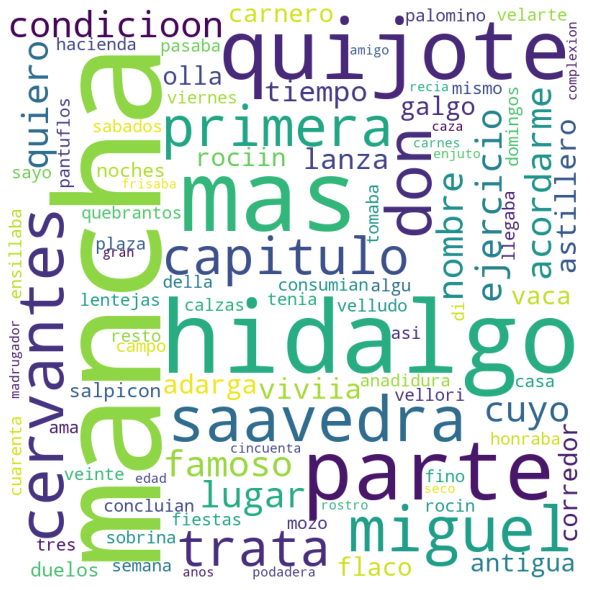

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(texto_limpio)

word_cloud.to_file("ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Dividimos por oraciones nuestro texto
texto_split = texto.splitlines()

# Aplicamos TF-IDF
X = vectorizer.fit_transform(texto_split)
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))
print(X.toarray())
print(X.shape)

['acordarme' 'adarga' 'algo' 'algu' 'ama' 'amigo' 'antigua' 'as' 'asi'
 'astillero' 'añadidura' 'años' 'calzas' 'campo' 'capítulo' 'carnero'
 'carnes' 'casa' 'caza' 'cervantes' 'cincuenta' 'como' 'complexión' 'con'
 'concluían' 'condicioón' 'consumían' 'corredor' 'cuarenta' 'cuyo' 'de'
 'del' 'della' 'di' 'domingos' 'don' 'duelos' 'edad' 'ejercicio' 'el' 'en'
 'enjuto' 'ensillaba' 'entre' 'era' 'famoso' 'fiestas' 'fino' 'flaco'
 'frisaba' 'galgo' 'gran' 'ha' 'hacienda' 'hidalgo' 'honraba' 'la' 'lanza'
 'las' 'lentejas' 'llegaba' 'lo' 'los' 'lugar' 'madrugador' 'mancha'
 'miguel' 'mismo' 'mozo' 'mucho' 'más' 'no' 'noches' 'nombre' 'nuestro'
 'olla' 'palomino' 'pantuflos' 'para' 'parte' 'partes' 'pasaba' 'plaza'
 'podadera' 'primera' 'que' 'quebrantos' 'quiero' 'quijote' 'recia'
 'resto' 'rociín' 'rocín' 'rostro' 'saavedra' 'salpicón' 'sayo' 'se'
 'seco' 'semana' 'sobrina' 'su' 'sus' 'sábados' 'tenía' 'tiempo' 'tomaba'
 'trata' 'tres' 'un' 'una' 'vaca' 'veinte' 'velarte' 'vellori' 'vellu

### Word2VEc

In [ ]:
# Descargamos los vectores
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.vec
!unzip wiki*.zip

Archive:  wiki.es.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of wiki.es.zip or
        wiki.es.zip.zip, and cannot find wiki.es.zip.ZIP, period.


In [ ]:
# Función para cargar un límite de vectores
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [ ]:
import io
src_path = '/content/wiki.es.vec'
cantidad = 50000
src_embeddings, src_id2word, src_word2id = load_vec(src_path, cantidad)

In [ ]:
# Obtenemos el id de una palabra
word_id=src_word2id.get('mundo')

# Obtenemos su vector
embeddings = src_embeddings[word_id]
print(word_id)
print(embeddings) # Vetos
print(len(embeddings)) # Dimensión del vector

176
[ 0.041607   -0.17109     0.20699    -0.29972     0.014916    0.39885
 -0.092973    0.095279    0.065415    0.00513    -0.012436    0.0024174
 -0.083478   -0.34231    -0.088509    0.38111     0.056324   -0.13678
  0.0095822  -0.35144    -0.091084    0.15454    -0.12515    -0.14996
  0.19308     0.043775    0.17767     0.047023   -0.24617    -0.019116
 -0.06392     0.12725     0.011406   -0.21684     0.22311     0.046371
 -0.37998     0.25983    -0.13507     0.20325    -0.22027     0.3101
 -0.13055    -0.15213    -0.24139    -0.21844     0.11583    -0.0188
 -0.10576     0.097846   -0.070489   -0.15202     0.090178   -0.34915
  0.39868    -0.24752    -0.16604    -0.37838     0.0014492   0.13515
  0.081507   -0.098112   -0.061549    0.0070209   0.089449   -0.093647
 -0.29339    -0.23524    -0.23623    -0.13117    -0.029077    0.0077056
 -0.38992     0.053449   -0.32377     0.1042     -0.099768   -0.30077
  0.40681     0.096499   -0.10812    -0.032693    0.22519     0.081135
 -0.11302 

In [ ]:
# Reducción de dimensión mediante PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) 
pca.fit(src_embeddings)

PCA(n_components=2, whiten=True)

In [ ]:
import matplotlib.pyplot as plt
# Función para visualizar los vectores en 2 dimensiones
def plot_similar_word(src_words, src_word2id, src_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)

    # find pca coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualización de vectores de palabras')

    plt.show()

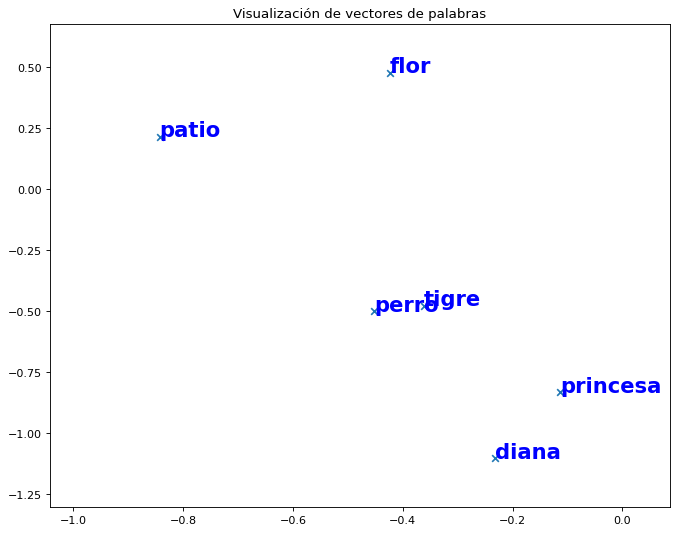

In [ ]:
src_words = [ 'tigre', 'perro', 'princesa', 'diana', 'flor', 'patio']
plot_similar_word(src_words, src_word2id, src_embeddings,  pca)